### Training a fully-connected neural network with 2 hidden layers and ReLU activations on MNIST dataset.

In [8]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchviz import make_dot, make_dot_from_trace
from matplotlib import pyplot as plt

### Load Dataset

In [9]:
# Converting the image into torch tensor and normalizing them to fall between 0 and 1

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.1307,), (0.3081,)),
                              ])

In [10]:
# Downloading the dataset
trainset = datasets.MNIST('.', download=True, train=True, transform=transform)
testset = datasets.MNIST('.', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

### Explore data

In [11]:
training_data= enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
images = images.view(images.shape[0], -1)
print(images.shape)
labels.shape


torch.Size([64, 784])


torch.Size([64])

### Defining Model : 
Train a fully-connected neural network with 2 hidden layers and ReLU activations.

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # define network layers
        self.hidden1 = nn.Linear(in_features=784, out_features=100)
        self.hidden2 = nn.Linear(in_features=100, out_features=50)
        self.output = nn.Linear(in_features=50, out_features=10)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.relu(self.hidden1(x))
        x = self.relu(self.hidden2(x))
        x = self.output(x)
        return x
    

# instantiate the model
model = Net()
print(model)


Net(
  (hidden1): Linear(in_features=784, out_features=100, bias=True)
  (hidden2): Linear(in_features=100, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
)


### Define Loss and optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Train the model

In [14]:
epochs = 20
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    
    total = 0
    correct = 0
    # training our model
    for idx, (images, labels) in enumerate(trainloader):

        images = images.view(images.shape[0], -1)
        outputs = model(images)
        
        optimizer.zero_grad()
        loss = criterion(outputs, labels)
        total_train_loss += loss.item()
        loss.backward()
        
        optimizer.step()
        
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
                
    accuracy_train = correct / total
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    model.eval()
    total = 0
    correct = 0
    for idx, (images, labels) in enumerate(testloader):
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        total_val_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy_val = correct/ total
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 2 == 0:
      print("Epoch: {}/{}  ".format(epoch, epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/20   Training loss: 0.8633   Testing loss: 0.3494   Train accuracy: 0.7754   Test accuracy: 0.9009  
Epoch: 2/20   Training loss: 0.2658   Testing loss: 0.2384   Train accuracy: 0.9233   Test accuracy: 0.9298  
Epoch: 4/20   Training loss: 0.2003   Testing loss: 0.1888   Train accuracy: 0.9422   Test accuracy: 0.9452  
Epoch: 6/20   Training loss: 0.1583   Testing loss: 0.1539   Train accuracy: 0.9549   Test accuracy: 0.9535  
Epoch: 8/20   Training loss: 0.1301   Testing loss: 0.1346   Train accuracy: 0.9629   Test accuracy: 0.9601  
Epoch: 10/20   Training loss: 0.1102   Testing loss: 0.1196   Train accuracy: 0.9690   Test accuracy: 0.9640  
Epoch: 12/20   Training loss: 0.0953   Testing loss: 0.1074   Train accuracy: 0.9727   Test accuracy: 0.9676  
Epoch: 14/20   Training loss: 0.0832   Testing loss: 0.1009   Train accuracy: 0.9762   Test accuracy: 0.9704  
Epoch: 16/20   Training loss: 0.0733   Testing loss: 0.0933   Train accuracy: 0.9790   Test accuracy: 0.9721  
Epoch:

### Plot Train Loss

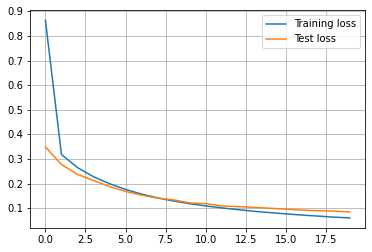

In [15]:
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Test loss')
plt.legend()
plt.grid()

### Plot Training Accuracy

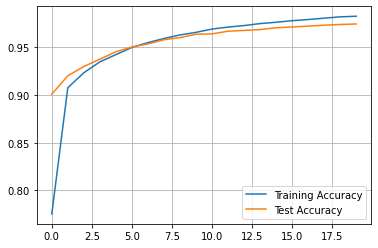

In [16]:
plt.plot(accuracy_total_train, label='Training Accuracy')
plt.plot(accuracy_total_val, label='Test Accuracy')
plt.legend()
plt.grid()